In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, median_absolute_error

In [45]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)

## Modelo univariado
variable x = LotArea, variable y = SalePrice

In [46]:
train_data=pd.read_csv("train.csv", encoding="latin1")
yTrain = train_data.pop("SalePrice") #La variable respuesta
xTrain = train_data.pop("LotArea") 

La separación entre train y test no es necesaria porque los datos ya fueron proporcionados de esa forma.

In [47]:
test_data=pd.read_csv("test.csv", encoding="latin1")
xTest = test_data.pop("LotArea") 

test_sample=pd.read_csv("sample_submission.csv", encoding="latin1")
yTest = test_sample.pop("SalePrice")

In [48]:
# EVALUANDO TRAIN Y TEST - Solo Selecciono una columna
price = yTrain.values.reshape(-1,1)
price_t = yTest.values.reshape(-1,1)
area = xTrain.values.reshape(-1,1)
area_t = xTest.values.reshape(-1,1)
lm = LinearRegression()
lm.fit(area, price)
price_pred = lm.predict(area_t)

### Ecuación

In [49]:
#y = mx + c
m = lm.coef_[0][0]
c = lm.intercept_[0]

label = r'price_pred = %0.4f*area % + 0.4f '%(m,c)
print(label)

price_pred = 2.1000*area +158836.1519 


Text(0.5, 1.0, 'Test set lot area vs sale price')

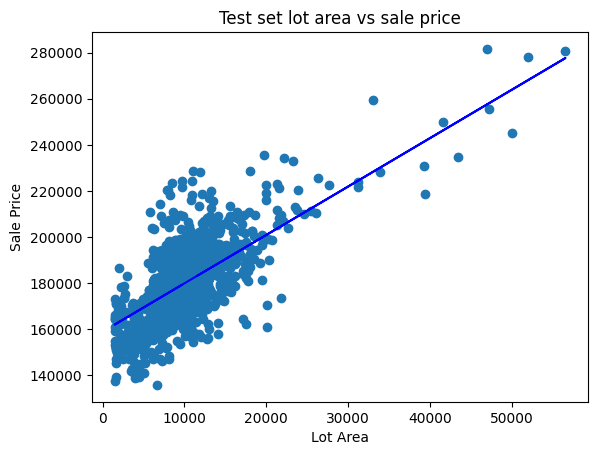

In [50]:
fig = plt.figure()
plt.scatter(area_t, price_t) # Valor teórico (test)
plt.plot(area_t, price_pred, color="blue") # valor predicho
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.title("Test set lot area vs sale price")

In [51]:
print("R^2: %.2f"%r2_score(price_t,price_pred))
print("MSE: %.2f"%mean_squared_error(price_t,price_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(price_t, price_pred)))

R^2: 0.50
MSE: 135044064.74
RMSE: 11620.85


### Residuales

In [52]:
residuales = price_t - price_pred

for i in range(0,len(price_t)):
    print(price_t[i], price_pred[i], " --> ", "\t\tDIFF:",residuales[i])

[169277.0524984] [183242.02591962]  -->  		DIFF: [-13964.97342122]
[187758.39398877] [188796.45173189]  -->  		DIFF: [-1038.05774312]
[183583.68356955] [187878.76398899]  -->  		DIFF: [-4295.08041944]
[179317.47751083] [179789.67203102]  -->  		DIFF: [-472.19452019]
[150730.0799765] [169346.51151517]  -->  		DIFF: [-18616.43153867]
[177150.98924731] [179835.87141395]  -->  		DIFF: [-2684.88216665]
[172070.65922916] [175593.9280715]  -->  		DIFF: [-3523.26884234]
[175110.95651955] [176480.11623512]  -->  		DIFF: [-1369.15971558]
[162011.69883167] [180205.46647745]  -->  		DIFF: [-18193.76764579]
[160726.24783142] [176475.91629122]  -->  		DIFF: [-15749.6684598]
[157933.279456] [171137.78758998]  -->  		DIFF: [-13204.50813398]
[145291.24502039] [162364.10477575]  -->  		DIFF: [-17072.85975536]
[159672.01763182] [162364.10477575]  -->  		DIFF: [-2692.08714393]
[164167.51830188] [163624.08794677]  -->  		DIFF: [543.43035511]
[150891.63824405] [163624.08794677]  -->  		DIFF: [-12732.4497027

In [53]:
# Calcular las diferencias absolutas
differences = [abs(t - p) for t, p in zip(price_t, price_pred)]

# Encontrar el índice con la diferencia máxima
max_index = differences.index(max(differences))

# Obtener los valores correspondientes
max_real_value = price_t[max_index]
max_pred_value = price_pred[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")


Índice: 621
Valor real: [223581.75819089]
Valor predicho: [176713.21312176]
Diferencia máxima: [46868.54506912]


Text(0, 0.5, 'Residuales')

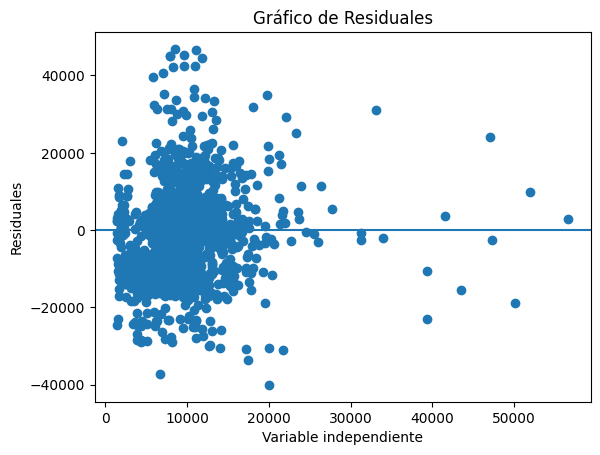

In [54]:
plt.plot(area_t,residuales, 'o')
plt.axhline(0)
plt.title("Gráfico de Residuales")
plt.xlabel("Variable independiente")
plt.ylabel("Residuales")


## Modelo multivariable

Separación de variables numéricas

In [55]:
train_data=pd.read_csv("train.csv", encoding="latin1")
test_data=pd.read_csv("test.csv", encoding="latin1")

columnas_cuantitativas = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

columnas_cuantitativas.remove("Id")
_train = train_data[columnas_cuantitativas]

columnas_cuantitativas.remove("SalePrice")
_test = test_data[columnas_cuantitativas]

print(columnas_cuantitativas)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [56]:
y_train = _train.pop("SalePrice")
X_train = _train

y_test = yTest
X_test = _test

#Normalización de datos
scaler = StandardScaler()  # Crear el escalador

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Iterar sobre las columnas para reemplazar NaN con la moda de cada columna
for col in X_train.columns:
    mode_value = X_train[col].mode()[0]
    X_train.loc[:, col] = X_train[col].fillna(mode_value)
    X_test.loc[:, col] = X_test[col].fillna(mode_value)

In [57]:
price = y_train.values.reshape(-1,1)
price_t = y_test.values.reshape(-1,1)
theRest = X_train.values
theRest_t = X_test.values

modelo1 = LinearRegression()
modelo1.fit(theRest, price)
y_pred_modelo1 = modelo1.predict(theRest_t)

### Ecuación

In [58]:
# Obtener coeficientes e intercepto
intercept = modelo1.intercept_[0]  # Intercepto
coefs = modelo1.coef_[0]  # Lista de coeficientes

# Obtener los nombres de las variables independientes (columnas de X)
variables = X_train.columns

# Construir la ecuación del modelo
equation = f"SalePrice = {intercept:.4f}"
for var, coef in zip(variables, coefs):
    equation += f" + ({coef:.4f} * {var})"

print(equation)

SalePrice = 440893.9555 + (-180.0826 * MSSubClass) + (-37.9207 * LotFrontage) + (0.4248 * LotArea) + (17308.8994 * OverallQual) + (4885.7965 * OverallCond) + (247.1441 * YearBuilt) + (113.3069 * YearRemodAdd) + (30.8692 * MasVnrArea) + (9.9392 * BsmtFinSF1) + (-0.5867 * BsmtFinSF2) + (-0.0671 * BsmtUnfSF) + (9.2854 * TotalBsmtSF) + (19.1904 * 1stFlrSF) + (19.3957 * 2ndFlrSF) + (-8.9068 * LowQualFinSF) + (29.6794 * GrLivArea) + (9269.7122 * BsmtFullBath) + (2183.0940 * BsmtHalfBath) + (3122.8089 * FullBath) + (-1923.9046 * HalfBath) + (-10047.4401 * BedroomAbvGr) + (-12763.0663 * KitchenAbvGr) + (4994.9559 * TotRmsAbvGrd) + (4176.9674 * Fireplaces) + (179.5364 * GarageYrBlt) + (12368.6100 * GarageCars) + (-5.1983 * GarageArea) + (23.4599 * WoodDeckSF) + (-4.5525 * OpenPorchSF) + (11.8992 * EnclosedPorch) + (20.2224 * 3SsnPorch) + (56.7819 * ScreenPorch) + (-29.1972 * PoolArea) + (-0.7157 * MiscVal) + (-41.9692 * MoSold) + (-780.2898 * YrSold)


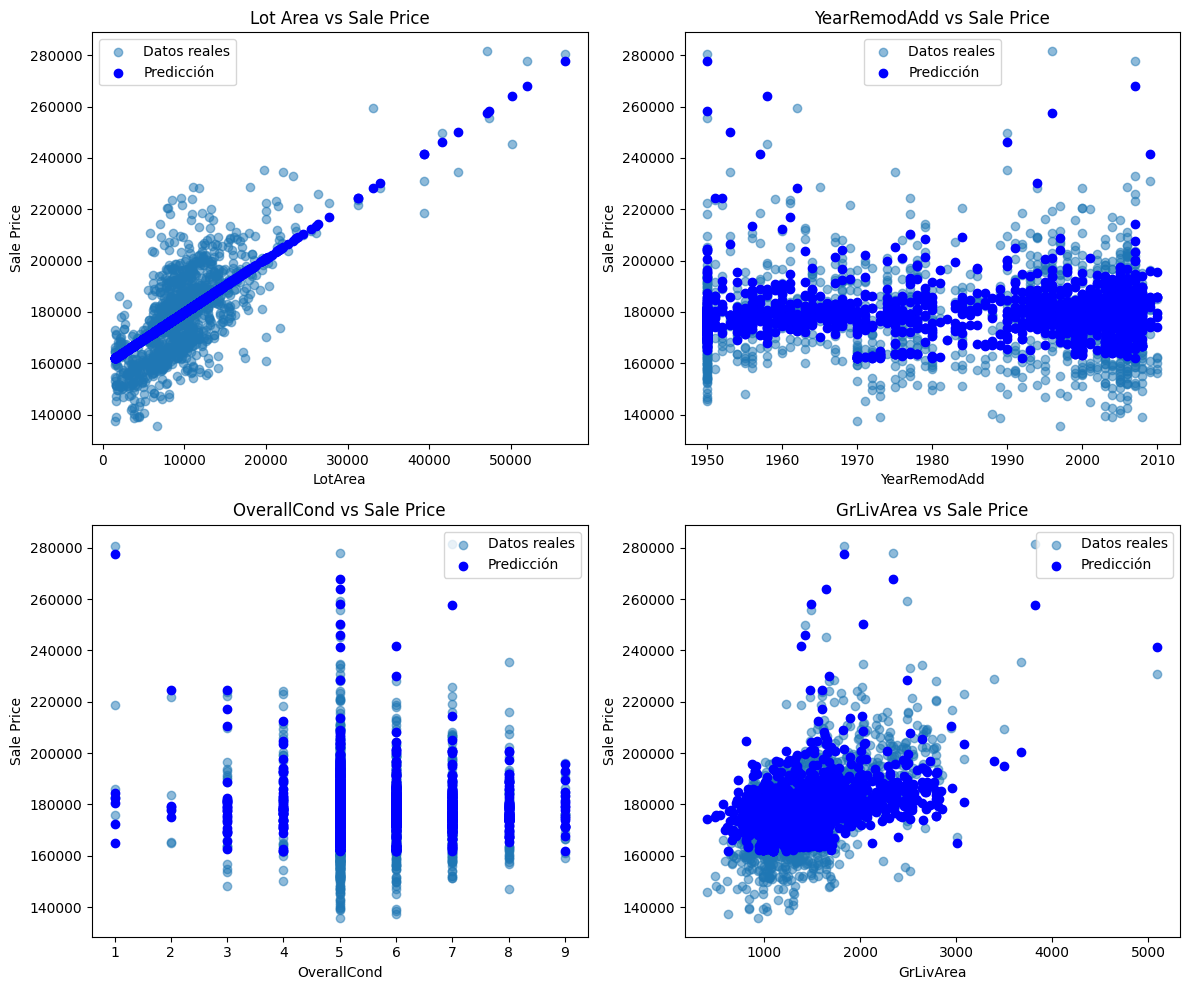

In [59]:
# Variables a graficar
variables = ["LotArea", "YearRemodAdd", "OverallCond", "GrLivArea"]
titles = ["Lot Area vs Sale Price", "YearRemodAdd vs Sale Price", 
          "OverallCond vs Sale Price", "GrLivArea vs Sale Price"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas
axes = axes.ravel()  # Convierte la matriz de ejes en una lista

for i, var in enumerate(variables):
    axes[i].scatter(X_test[var], price_t, label="Datos reales", alpha=0.5)
    axes[i].scatter(X_test[var], price_pred, color="blue", label="Predicción")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Sale Price")
    axes[i].set_title(titles[i])
    axes[i].legend()

plt.tight_layout()  # Ajusta los gráficos para que no se superpongan
plt.show()

In [60]:
# Regression metrics
mse_modelo1=mean_squared_error(price_t, y_pred_modelo1) 
r2_modelo1=r2_score(price_t, y_pred_modelo1)

print('R^2: ', round(r2_modelo1,4))
print('MSE: ', round(mse_modelo1,4))
print('RMSE: ', round(np.sqrt(mse_modelo1),4))

R^2:  -16.4151
MSE:  4748525847.3721
RMSE:  68909.5483


### Análisis de residuos

In [61]:
resid_modelo1=price_t-y_pred_modelo1
for i in range(0,len(price_t)):
    print(price_t[i], y_pred_modelo1[i], " --> ", "\t\tDIFF:",resid_modelo1[i])

[169277.0524984] [115773.65967911]  -->  		DIFF: [53503.39281929]
[187758.39398877] [150998.73628546]  -->  		DIFF: [36759.6577033]
[183583.68356955] [172926.81346222]  -->  		DIFF: [10656.87010734]
[179317.47751083] [199635.86073098]  -->  		DIFF: [-20318.38322015]
[150730.0799765] [195167.30202735]  -->  		DIFF: [-44437.22205085]
[177150.98924731] [181938.10905985]  -->  		DIFF: [-4787.11981255]
[172070.65922916] [199449.6407527]  -->  		DIFF: [-27378.98152353]
[175110.95651955] [171771.16395959]  -->  		DIFF: [3339.79255996]
[162011.69883167] [207357.42213669]  -->  		DIFF: [-45345.72330503]
[160726.24783142] [113486.68305575]  -->  		DIFF: [47239.56477567]
[157933.279456] [204328.44956334]  -->  		DIFF: [-46395.17010733]
[145291.24502039] [116802.07930667]  -->  		DIFF: [28489.16571372]
[159672.01763182] [98926.00744212]  -->  		DIFF: [60746.0101897]
[164167.51830188] [149522.41752338]  -->  		DIFF: [14645.1007785]
[150891.63824405] [117097.72142169]  -->  		DIFF: [33793.91682237]


In [62]:
# Calcular las diferencias absolutas
differences = [abs(t - p) for t, p in zip(price_t, y_pred_modelo1)]

# Encontrar el índice con la diferencia máxima
max_index = differences.index(max(differences))

# Obtener los valores correspondientes
max_real_value = price_t[max_index]
max_pred_value = y_pred_modelo1[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")

Índice: 1089
Valor real: [230841.33862628]
Valor predicho: [634201.95921861]
Diferencia máxima: [403360.62059233]


Text(0, 0.5, 'Residuales')

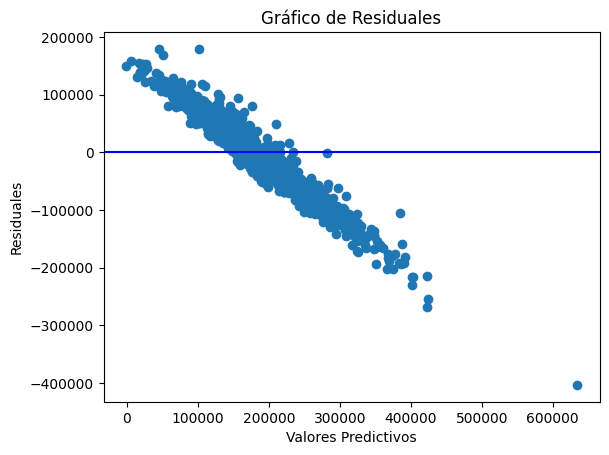

In [63]:
plt.scatter(y_pred_modelo1,resid_modelo1)
plt.axhline(0,color='blue')
plt.title("Gráfico de Residuales")
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')